In [240]:
NA = 6.0221429e23  # Avogadro constant in per moles
k = 1.3806488e-23  # Boltzmann constant in joule/ degree K
h = 6.62606957e-34  # Planck constant in Joule - seconds
Co = 299792458  # Speed of light in meters/second
eo = 1.602176565e-19  # Elementary charge in Coulomb
eV = 1.602176565e-19  # Electron volt in joules
me = 9.10938291e-31  # Electron rest mass in kilograms
mee = 0.510998928  # Electron rest mass in MeV
mp = 1.672621778e-27  # Proton rest mass in kilograms
mpe = 938.272046  # Proton rest mass in MeV
mn = 1.674927352e-27  # Neutron rest mass in kilograms
MH = 1.6735575e-27 # Hidrogen mass in kg
mne = 939.565379  # Neutron rest mass in MeV
ma = 6.64465675e-27  # Alpha particle rest mass in kilograms
mae = 3727.379240  # Alpha particle rest mass in MeV
md = 3.34358348e-27  # Deuteron rest mass in kilograms
mde = 1875.612859  # Deuteron rest mass in MeV
u = 1.660538921e-27  # Atomic mass unit in kilograms
ue = 931.494061  # Atomic mass unit in MeV


In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = "mymass20.csv"  # Reemplaza con la ruta de tu archivo
# Lista con los nombres de las columnas
column_names = ["N", "Z", "A","MASS EXCESS (keV)", "M.E ERROR (keV)", "(BIND ENERGY)/A (keV)","B.E/A ERROR (keV)", "ATOMIC MASS (micro-u)", "A.M ERROR (micro-u)"]

# Lee el archivo CSV con los nombres de las columnas personalizados
df = pd.read_csv(file_path, header=0, names=column_names)

# Muestra las primeras filas del DataFrame
df

,N,Z,A,MASS EXCESS (keV),M.E ERROR (keV),(BIND ENERGY)/A (keV),B.E/A ERROR (keV),ATOMIC MASS (micro-u),A.M ERROR (micro-u)
0,0,1,1,7288.971064,0.000013,0.00000,0.00000,1.007825e+06,0.000014
1,1,1,2,13135.722900,0.000015,1112.28310,0.00020,2.014102e+06,0.000015
2,2,1,3,14949.810900,0.000080,2827.26540,0.00036,3.016049e+06,0.000080
3,1,2,3,14931.218880,0.000060,2572.68044,0.00015,3.016029e+06,0.000060
4,0,3,3,28667.000000,2000.000000,-2267.00000,667.00000,3.030775e+06,2147.000000
...,...,...,...,...,...,...,...,...,...
3552,176,117,293,194428.000000,778.000000,7095.00000,3.00000,2.932087e+08,835.000000
3553,175,118,293,198802.000000,709.000000,7078.00000,2.00000,2.932134e+08,761.000000
3554,177,117,294,196397.000000,593.000000,7092.00000,2.00000,2.942108e+08,637.000000
3555,176,118,294,199320.000000,553.000000,7079.00000,2.00000,2.942140e+08,594.000000


In [242]:
# Filtramos el DataFrame para los elementos donde Z es igual a 8
element_8_df = df.loc[(df['Z'] == 8) , ['Z', 'N', 'A', '(BIND ENERGY)/A (keV)']].copy()
#element_20_df = df.loc[(df['Z'] == 20) | (df['Z'] == 19 ), ['Z', 'N', '(BIND ENERGY)/A (keV)']].copy()
#element_82_df = df.loc[(df['Z'] == 82) | (df['Z'] == 81 ), ['Z', 'N', '(BIND ENERGY)/A (keV)']].copy()
# 'copy()' se usa para evitar problemas de referencia y modificar el DataFrame original

element_8_df['Energia_de_enlace (keV)'] = df['(BIND ENERGY)/A (keV)'] * df['A']

""" 
# Creamos un gráfico de dispersión para la tercera columna vs la primera columna
plt.scatter(element_8_df['N'], element_8_df['Energia_Separacion_Neutrones (keV)'])
plt.title('Energía de separación de protones (Z=8)')
plt.xlabel('Número de neutrones (N)')
plt.ylabel('Energía de separación de protones (BIND ENERGY)/A (keV)')
plt.grid(True)
plt.show()
"""
element_8_df

,Z,N,A,(BIND ENERGY)/A (keV),Energia_de_enlace (keV)
43,8,3,11,3162.4372,34786.8092
49,8,4,12,4881.9755,58583.7060
55,8,5,13,5811.7636,75552.9268
61,8,6,14,7052.2783,98731.8962
67,8,7,15,7463.6915,111955.3725
74,8,8,16,7976.2072,127619.3152
80,8,9,17,7750.7291,131762.3947
87,8,10,18,7767.0981,139807.7658
94,8,11,19,7566.4952,143763.4088
102,8,12,20,7568.5707,151371.4140


# Punto 2

In [243]:
s_e_mass_df = df.loc[:, ['Z', 'N', 'A', '(BIND ENERGY)/A (keV)','ATOMIC MASS (micro-u)']].copy()
s_e_mass_df['(BIND ENERGY)/A (MeV)'] = s_e_mass_df['(BIND ENERGY)/A (keV)']/1e3
s_e_mass_df['Energia_de_enlace (MeV)'] = s_e_mass_df['(BIND ENERGY)/A (MeV)'] * s_e_mass_df['A']
s_e_mass_df['Uma']=s_e_mass_df['ATOMIC MASS (micro-u)']/1e6


s_e_mass_df

,Z,N,A,(BIND ENERGY)/A (keV),ATOMIC MASS (micro-u),(BIND ENERGY)/A (MeV),Energia_de_enlace (MeV),Uma
0,1,0,1,0.00000,1.007825e+06,0.000000,0.000000,1.007825
1,1,1,2,1112.28310,2.014102e+06,1.112283,2.224566,2.014102
2,1,2,3,2827.26540,3.016049e+06,2.827265,8.481796,3.016049
3,2,1,3,2572.68044,3.016029e+06,2.572680,7.718041,3.016029
4,3,0,3,-2267.00000,3.030775e+06,-2.267000,-6.801000,3.030775
...,...,...,...,...,...,...,...,...
3552,117,176,293,7095.00000,2.932087e+08,7.095000,2078.835000,293.208727
3553,118,175,293,7078.00000,2.932134e+08,7.078000,2073.854000,293.213423
3554,117,177,294,7092.00000,2.942108e+08,7.092000,2085.048000,294.210840
3555,118,176,294,7079.00000,2.942140e+08,7.079000,2081.226000,294.213979


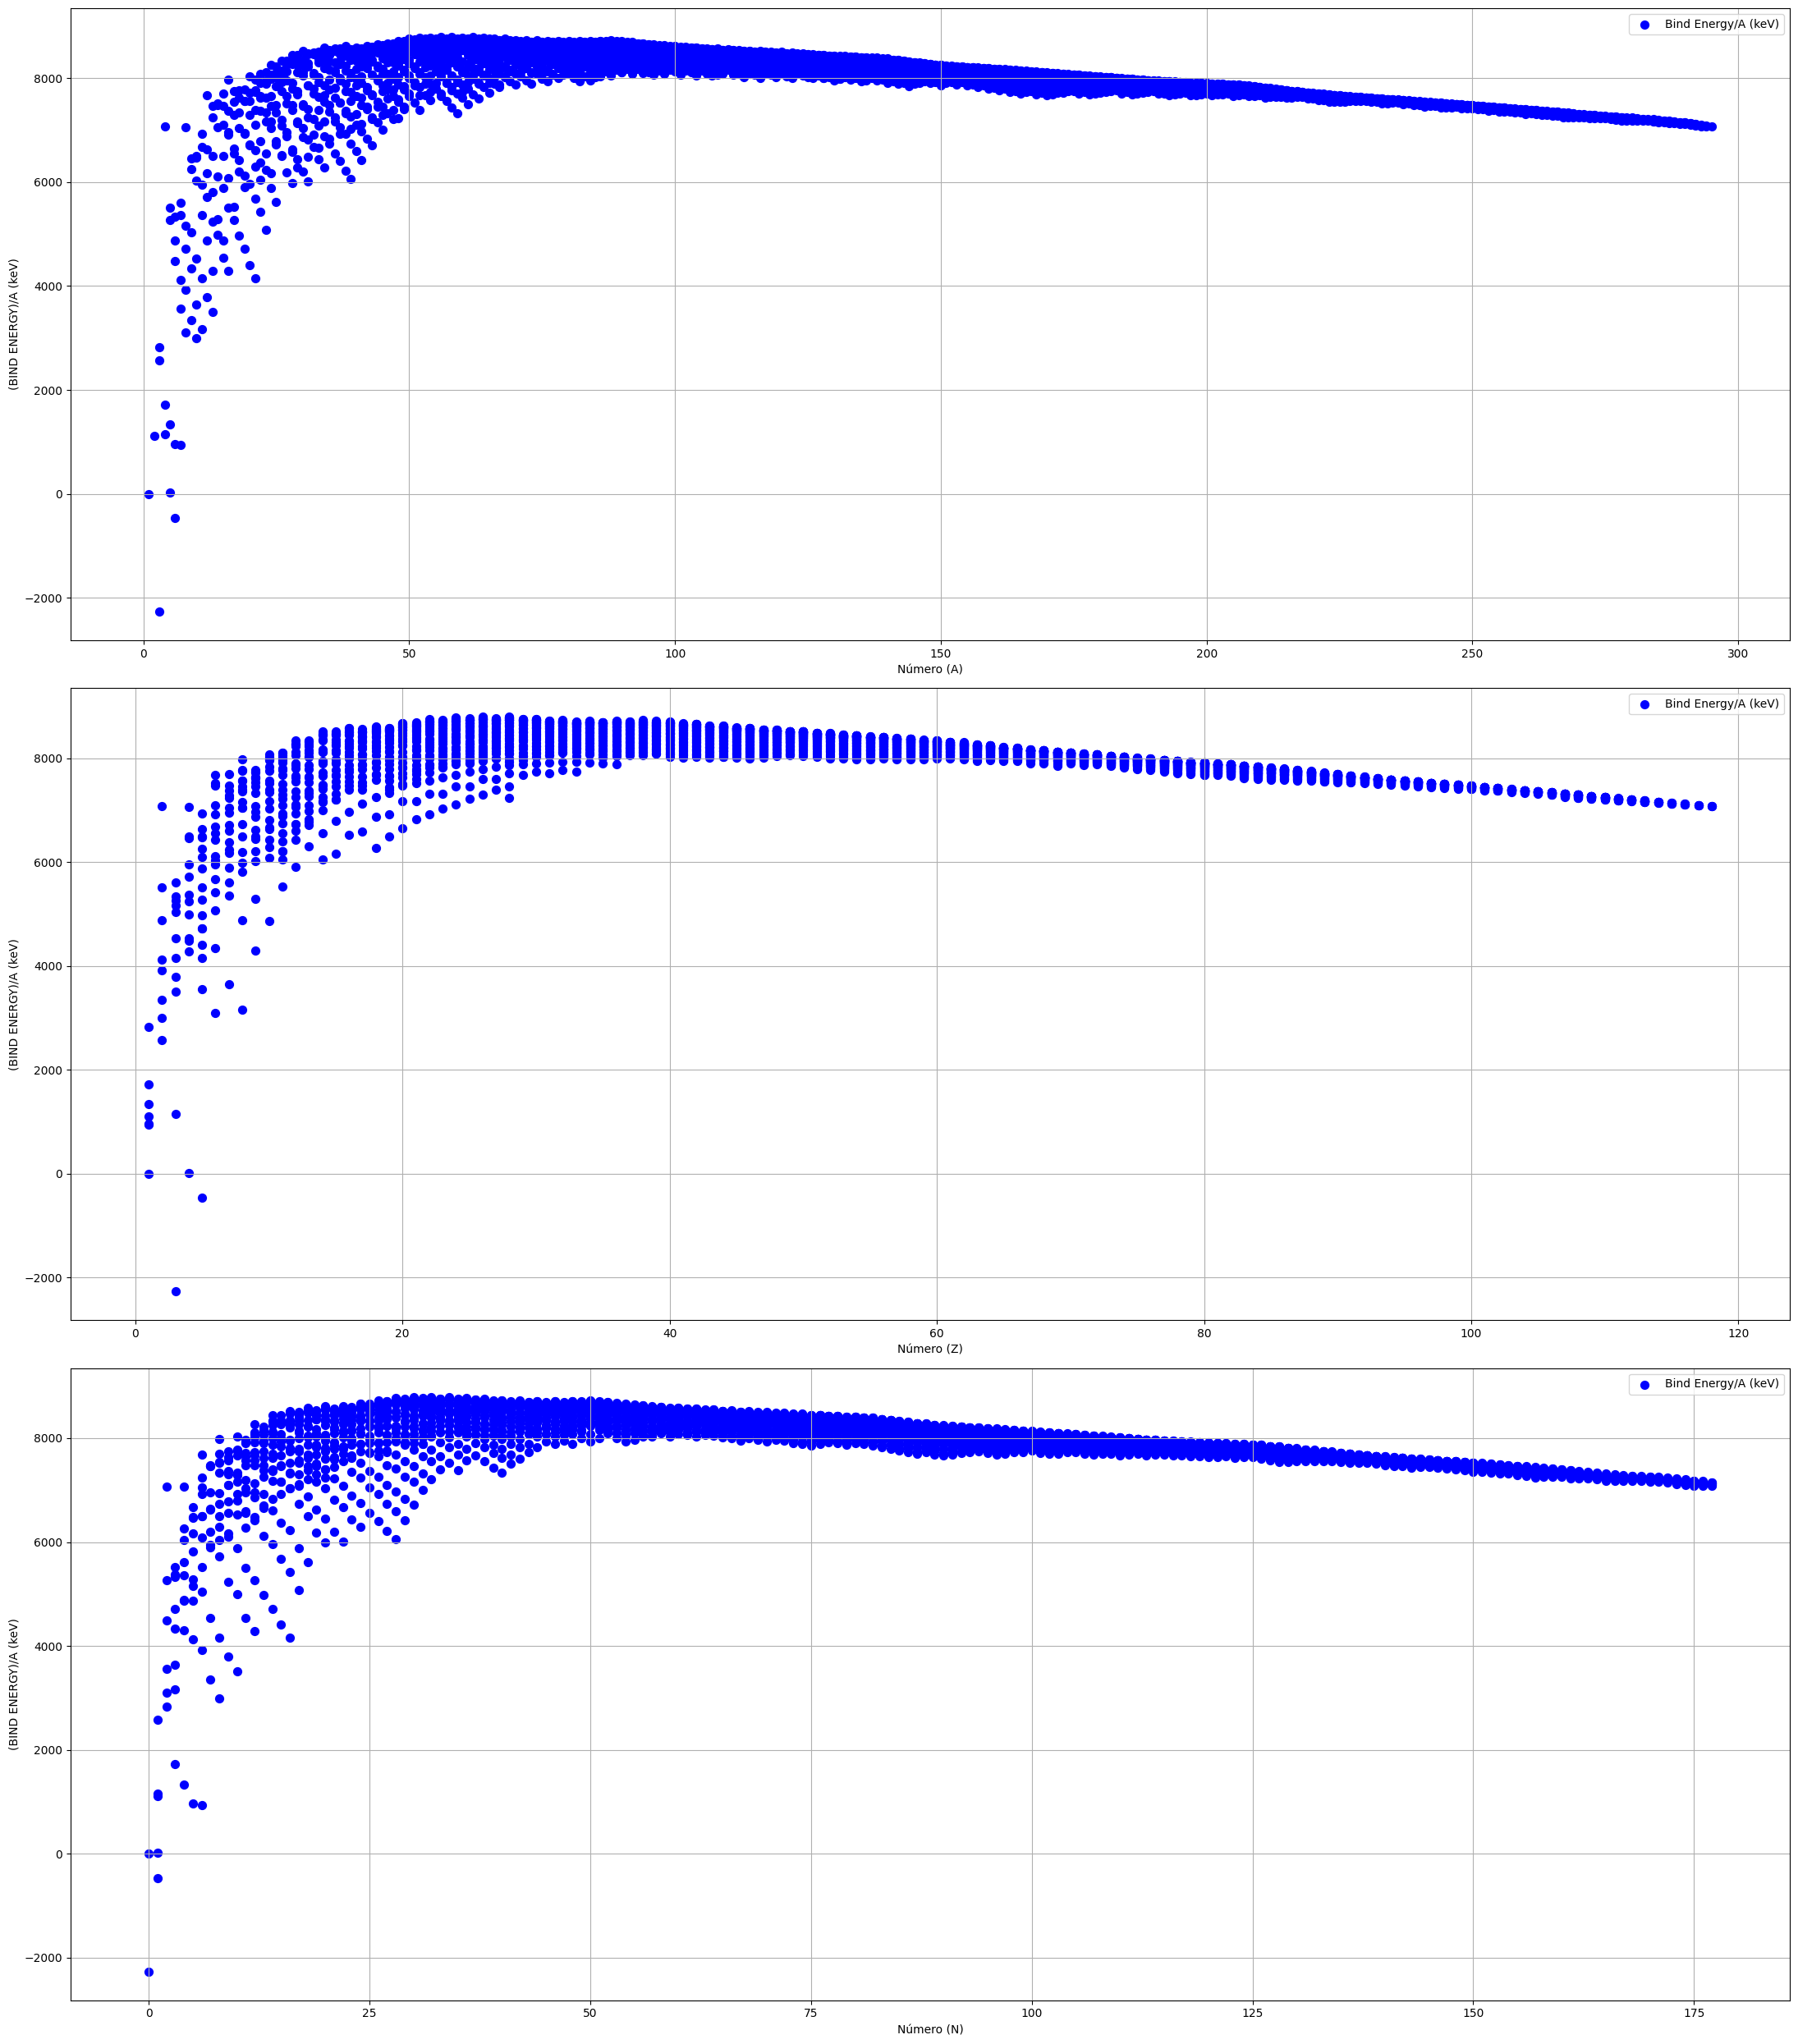

In [244]:
# Creamos gráficas independientes para cada elemento
plt.figure(figsize=(22, 25))
plt.subplots_adjust(hspace=0.5)

plt.subplot(3, 1, 1)
plt.scatter(s_e_mass_df['A'], s_e_mass_df['(BIND ENERGY)/A (keV)'], s = 50, color='blue', marker='o', label='Bind Energy/A (keV)')
plt.xlabel('Número (A)')
plt.ylabel('(BIND ENERGY)/A (keV)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(s_e_mass_df['Z'], s_e_mass_df['(BIND ENERGY)/A (keV)'], s = 50, color='blue', marker='o', label='Bind Energy/A (keV)')
plt.xlabel('Número (Z)')
plt.ylabel('(BIND ENERGY)/A (keV)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(s_e_mass_df['N'], s_e_mass_df['(BIND ENERGY)/A (keV)'], s = 50, color='blue', marker='o', label='Bind Energy/A (keV)')
plt.xlabel('Número (N)')
plt.ylabel('(BIND ENERGY)/A (keV)')
plt.grid(True)
plt.legend()

# Ajustamos el diseño para evitar superposición de etiquetas
plt.tight_layout()

# Mostramos las gráficas
plt.show()


In [245]:
# Constantes alphas 1 a 4;
a_v = 15.48  # "MeV"e3="keV"
a_s = 17.23  # "MeV"e3="keV"
a_c = 0.697  # "MeV"e3="keV"
a_a = 22.6  # "MeV"e3="keV"


def BE(Z, N, n=4):
    A = Z+N

    if n == 1:
        return ((a_v*A))
    elif n == 2:
        return ((a_v*A)-(a_s*(A**(2/3))))
    elif n == 3:
        return ((a_v*A)-(a_s*(A**(2/3)))-(a_c*((Z**2)/(A**(1/3)))))
    elif n == 4:
        return ((a_v*A)-(a_s*(A**(2/3)))-(a_c*((Z**2)/(A**(1/3))))-(a_a*(((N-Z)**2)/(A))))
    else:
        print('Los valores validos para el tercer argumento es entre 1 y 4.')

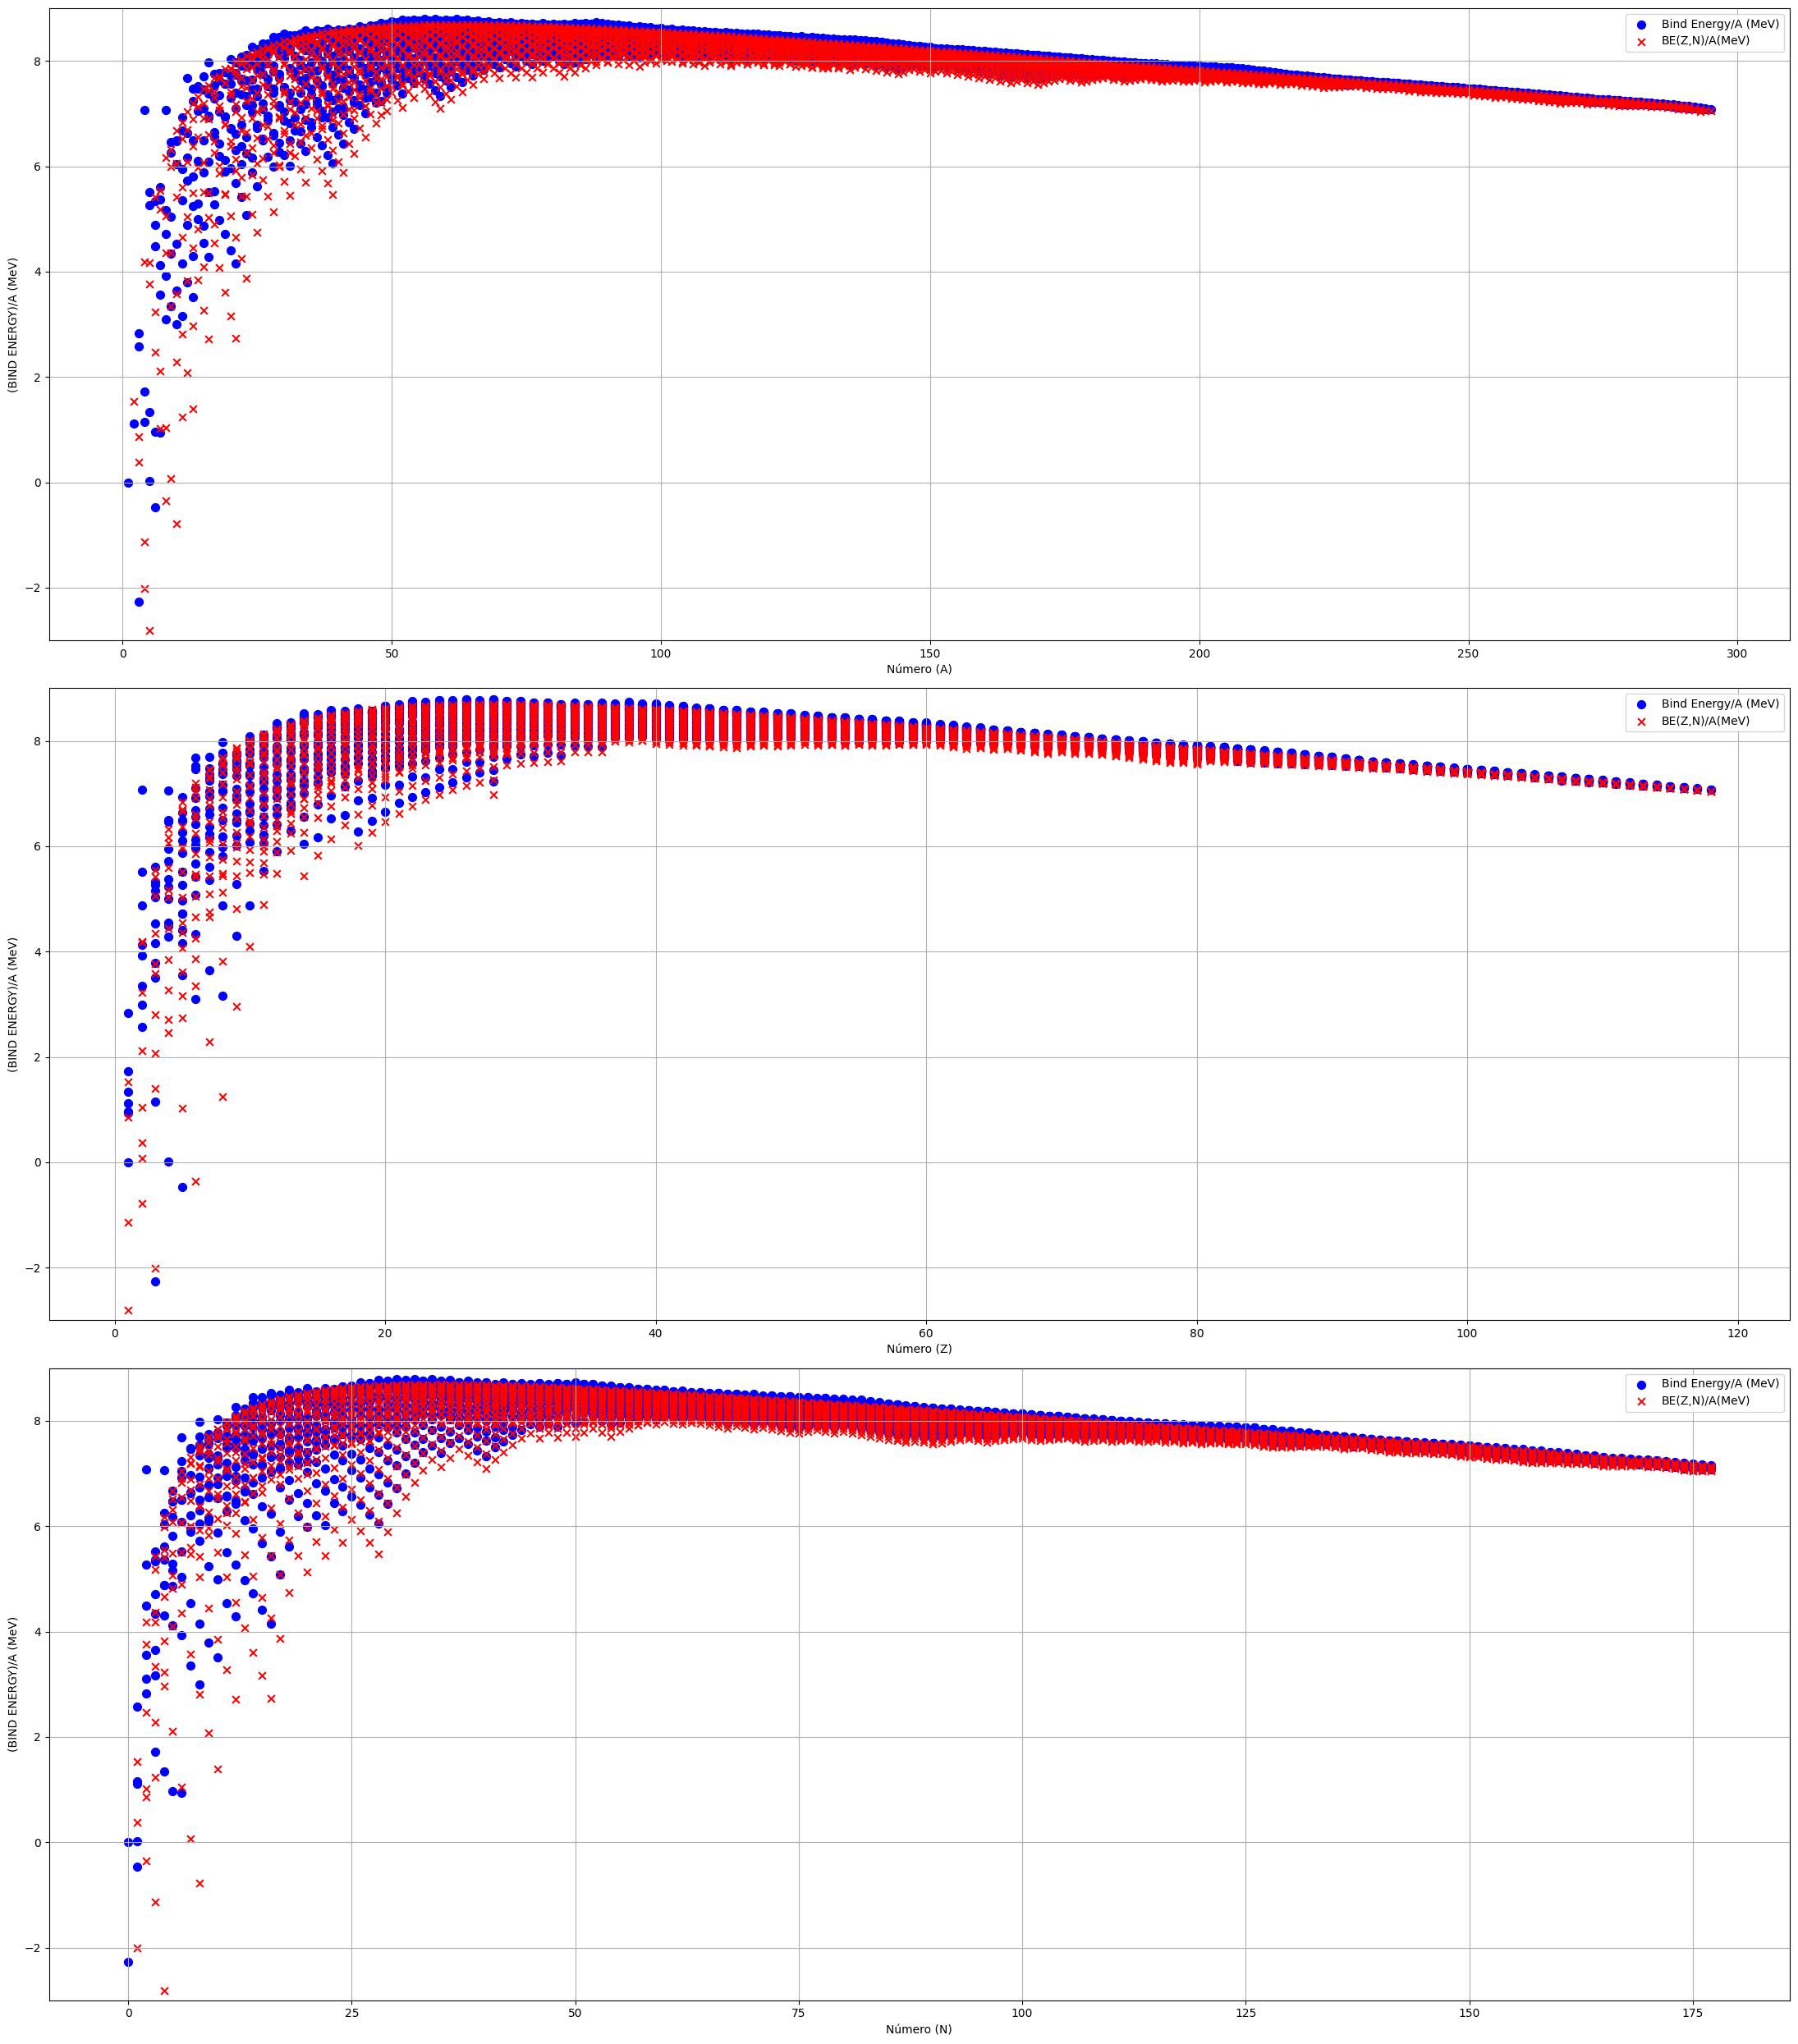

In [246]:
s_e_mass_df['BE(Z,N)/A(MeV)'] = (BE(s_e_mass_df['Z'],s_e_mass_df['N']))/s_e_mass_df['A']

# Creamos gráficas independientes para cada elemento
plt.figure(figsize=(22, 25))
plt.subplots_adjust(hspace=0.5)

plt.subplot(3, 1, 1)
plt.scatter(s_e_mass_df['A'], s_e_mass_df['(BIND ENERGY)/A (MeV)'], s = 50, color='blue', marker='o', label='Bind Energy/A (MeV)')
plt.scatter(s_e_mass_df['A'], s_e_mass_df['BE(Z,N)/A(MeV)'], s =40 , color='red', marker='x', label='BE(Z,N)/A(MeV)')
plt.xlabel('Número (A)')
plt.ylabel('(BIND ENERGY)/A (MeV)')
plt.ylim(-3,9)
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(s_e_mass_df['Z'], s_e_mass_df['(BIND ENERGY)/A (MeV)'], s = 50, color='blue', marker='o', label='Bind Energy/A (MeV)')
plt.scatter(s_e_mass_df['Z'], s_e_mass_df['BE(Z,N)/A(MeV)'], s =40 , color='red', marker='x', label='BE(Z,N)/A(MeV)')
plt.xlabel('Número (Z)')
plt.ylabel('(BIND ENERGY)/A (MeV)')
plt.ylim(-3,9)
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(s_e_mass_df['N'], s_e_mass_df['(BIND ENERGY)/A (MeV)'], s = 50, color='blue', marker='o', label='Bind Energy/A (MeV)')
plt.scatter(s_e_mass_df['N'], s_e_mass_df['BE(Z,N)/A(MeV)'], s =40 , color='red', marker='x', label='BE(Z,N)/A(MeV)')
plt.xlabel('Número (N)')
plt.ylabel('(BIND ENERGY)/A (MeV)')
plt.ylim(-3,9)
plt.grid(True)
plt.legend()

# Ajustamos el diseño para evitar superposición de etiquetas
plt.tight_layout()

# Mostramos las gráficas
plt.show()

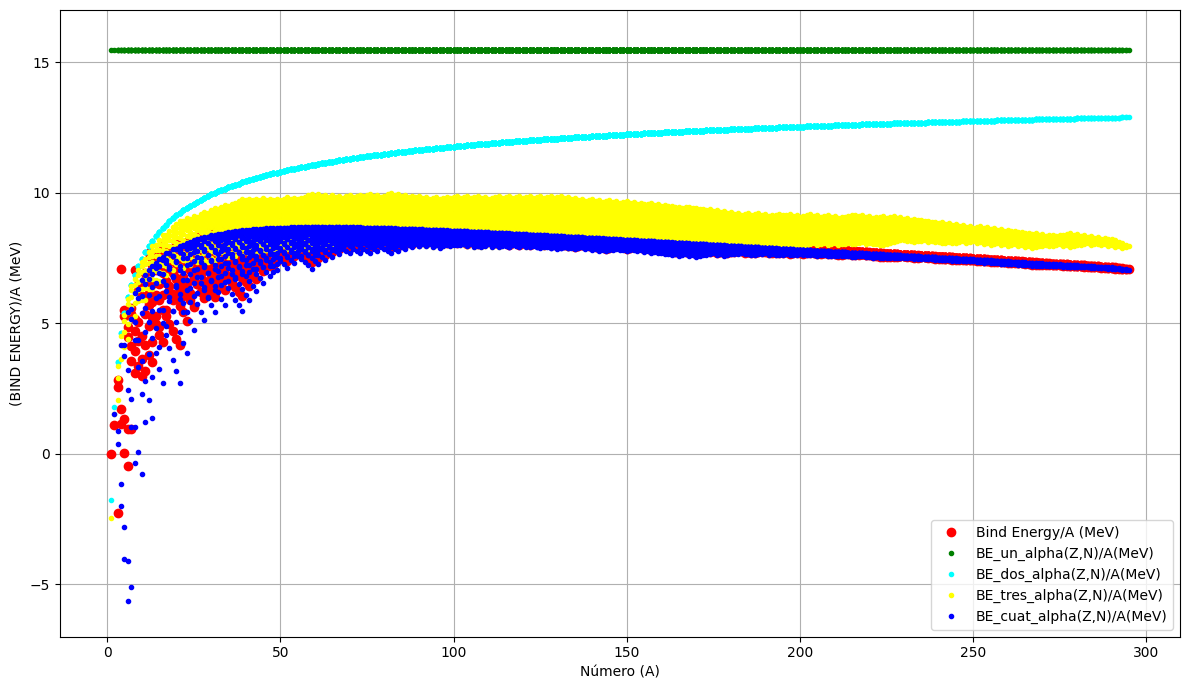

In [247]:
s_e_mass_df['BE_un_alpha(Z,N)/A(MeV)'] = (BE(s_e_mass_df['Z'],s_e_mass_df['N'], 1))/s_e_mass_df['A']
s_e_mass_df['BE_dos_alpha(Z,N)/A(MeV)'] = (BE(s_e_mass_df['Z'],s_e_mass_df['N'], 2))/s_e_mass_df['A']
s_e_mass_df['BE_tres_alpha(Z,N)/A(MeV)'] = (BE(s_e_mass_df['Z'],s_e_mass_df['N'], 3))/s_e_mass_df['A']
s_e_mass_df['BE_cuat_alpha(Z,N)/A(MeV)'] = (BE(s_e_mass_df['Z'],s_e_mass_df['N']))/s_e_mass_df['A']

# Creamos gráficas independientes para cada elemento
plt.figure(figsize=(12, 7))


plt.plot(s_e_mass_df['A'], s_e_mass_df['(BIND ENERGY)/A (MeV)'],
         color='red', marker='o',linestyle='', label='Bind Energy/A (MeV)')
plt.plot(s_e_mass_df['A'], s_e_mass_df['BE_un_alpha(Z,N)/A(MeV)'],
         color='green', marker='.',linestyle='', label='BE_un_alpha(Z,N)/A(MeV)')
plt.plot(s_e_mass_df['A'], s_e_mass_df['BE_dos_alpha(Z,N)/A(MeV)'],
         color='cyan', marker='.',linestyle='', label='BE_dos_alpha(Z,N)/A(MeV)')
plt.plot(s_e_mass_df['A'], s_e_mass_df['BE_tres_alpha(Z,N)/A(MeV)'],
         color='yellow', marker='.',linestyle='', label='BE_tres_alpha(Z,N)/A(MeV)')
plt.plot(s_e_mass_df['A'], s_e_mass_df['BE_cuat_alpha(Z,N)/A(MeV)'],
         color='blue', marker='.',linestyle='', label='BE_cuat_alpha(Z,N)/A(MeV)')


plt.xlabel('Número (A)')
plt.ylabel('(BIND ENERGY)/A (MeV)')
plt.ylim(-7,17)
plt.grid(True)
plt.legend()

# Ajustamos el diseño para evitar superposición de etiquetas
plt.tight_layout()

# Mostramos las gráficas
plt.show()

*   Considerando la ecuación de masa isobárica
$$
M(Z,A)c^{2} = \alpha + \beta Z + \gamma Z^{2} - δ(A)
$$
con
$$
\alpha = A m_n c^{2} - a_vA + a_sA^{2/3} + a_asymA
$$
$$
\beta = (M_H - m_n)c^{2} - 4a_asym
$$
$$
\gamma = \frac{a_c}{A^{1/3}}+\frac{4a_asym}{A}
$$
$$
δ = 0
$$

Y usando los datos para los A = 131 hacemos lo siguiente:

In [248]:
ztelurioxenonbario_df = s_e_mass_df.loc[((s_e_mass_df['A'] == 131) & (s_e_mass_df['Z'].isin([52, 54, 56]))), ['Z', 'Uma']].copy()
ztelurioxenonbario_df.reset_index(drop=True, inplace=True)
ztelurioxenonbario_df

,Z,Uma
0,52,130.908522
1,54,130.905084
2,56,130.906946


In [249]:
Const = np.polyfit(ztelurioxenonbario_df['Z'], ztelurioxenonbario_df['Uma'], 2, rcond=None, full=False, w=None, cov=False)
Const

array([ 6.62537500e-04, -7.19480250e-02,  1.32858318e+02])

In [250]:
alpha = Const[2]
beta = Const[1]
gamma = Const[0]

print("Alpha= ", alpha)
print("Beta= ", beta)
print("Gamma = ", gamma)

Alpha=  132.85831810002955
Beta=  -0.07194802500108019
Gamma =  0.0006625375000098879


In [251]:
def MTeo(Z):
    return alpha+beta*Z+gamma*(Z**2)

def MExp(Z,BE):
  return     (1.00782503 - 1.00866501)*Z + 131*1.00866501 - (BE)/(931.05)


In [252]:
a_131_df = s_e_mass_df.loc[((s_e_mass_df['A'] == 131)), ['Z', 'A', 'Energia_de_enlace (MeV)' , 'Uma']].copy()
a_131_df.reset_index(drop=True, inplace=True)
a_131_df['MTeo(Z)'] = MTeo(a_131_df['Z'])
a_131_df['MExp(Z,BE)'] = MExp(a_131_df['Z'],a_131_df['Energia_de_enlace (MeV)'])
a_131_df

,Z,A,Energia_de_enlace (MeV),Uma,MTeo(Z),"MExp(Z,BE)"
0,46,131,1047.083000,130.972367,130.950638,130.971851
1,47,131,1061.362000,130.956253,130.940306,130.955675
2,48,131,1075.001772,130.940728,130.931299,130.940185
3,49,131,1087.032026,130.926973,130.923617,130.926424
4,50,131,1095.489897,130.917053,130.917261,130.916500
5,51,131,1099.424377,130.911989,130.912229,130.911434
6,52,131,1101.871641,130.908522,130.908522,130.907965
7,53,131,1103.320999,130.906126,130.906141,130.905569
8,54,131,1103.509508,130.905084,130.905084,130.904526
9,55,131,1102.369153,130.905469,130.905353,130.904911


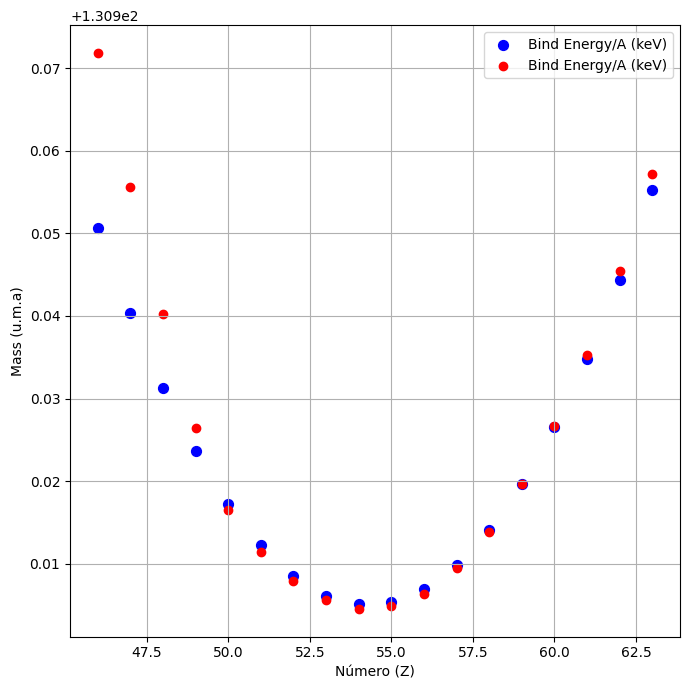

In [253]:
plt.figure(figsize=(7, 7))

plt.scatter(a_131_df['Z'], a_131_df['MTeo(Z)'], s = 50, color='blue', marker='o', label='Bind Energy/A (keV)')
plt.scatter(a_131_df['Z'], a_131_df['MExp(Z,BE)'], linestyle = '-', color='red', label='Bind Energy/A (keV)')
plt.xlabel('Número (Z)')
plt.ylabel('Mass (u.m.a)')
plt.grid(True)
plt.legend()

# Ajustamos el diseño para evitar superposición de etiquetas
plt.tight_layout()

# Mostramos las gráficas
plt.show()

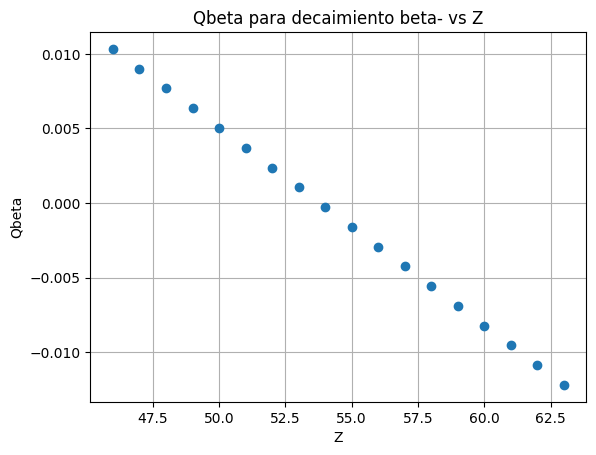

In [254]:
def Qb(Z):
    return (-beta - gamma - 2*gamma*Z)

a_131_df['Qbeta'] = Qb(a_131_df['Z'])

plt.plot(a_131_df['Z'],a_131_df['Qbeta'],'o')
plt.xlabel('Z')
plt.ylabel('Qbeta')
plt.title('Qbeta para decaimiento beta- vs Z')
plt.grid(True)

plt.show()

In [255]:

def ZA(beta, gamma):
    return (-beta)/(2*gamma)

Za = ZA(beta,gamma)

print(Za,'sdffw', round(Za + 0.5))

54.29732279305429 sdffw 55


In [258]:
#para ello, derivemos numericamente los datos experimentales:
Qbeta_menos=[]
for i in range(0,len(a_131_df['Z'])):
  if i==0:
    derivada_MassExpy_i = (a_131_df['MExp(Z,BE)'][i+1]-a_131_df['MExp(Z,BE)'][i])/abs(a_131_df['Z'][i+1]-a_131_df['Z'][i])
    Qbeta_menos.append(derivada_MassExpy_i)
  elif i==len(a_131_df['Z'])-1:
    derivada_MassExpy_f = (a_131_df['MExp(Z,BE)'][i]-a_131_df['MExp(Z,BE)'][i-1])/abs(a_131_df['Z'][i]-a_131_df['Z'][i-1])
    Qbeta_menos.append(derivada_MassExpy_f)
  else:
    derivada_MassExpy = (a_131_df['MExp(Z,BE)'][i+1]-a_131_df['MExp(Z,BE)'][i-1])/(abs(a_131_df['Z'][i+1]-a_131_df['Z'][i-1]))
    Qbeta_menos.append(derivada_MassExpy)

#realizado lo anterior, apliquemos minimos cuadrados a estos datos:
Const = np.polyfit(a_131_df['Z'], Qbeta_menos, 1)
print("El valor para el numero entero del isóbaro más estable es;", np.floor(abs(Const[1]/Const[0])))

El valor para el numero entero del isóbaro más estable es; 55.0


In [259]:
zantimoylanta_df = s_e_mass_df.loc[((s_e_mass_df['A'] == 131) & (s_e_mass_df['Z'].isin([51, 57]))), ['Z', 'Energia_de_enlace (MeV)', 'Uma']].copy()
zantimoylanta_df.reset_index(drop=True, inplace=True)
zantimoylanta_df['MTeo(Z)'] = MTeo(zantimoylanta_df['Z'])
zantimoylanta_df['MExp(Z,BE)'] = MExp(zantimoylanta_df['Z'],zantimoylanta_df['Energia_de_enlace (MeV)'])
zantimoylanta_df

,Z,Energia_de_enlace (MeV),Uma,MTeo(Z),"MExp(Z,BE)"
0,51,1099.424377,130.911989,130.912229,130.911434
1,57,1096.518156,130.910070,130.909865,130.909515


In [261]:
#Para los datos experimetales
MassLax = (1.00782503 - 1.00866501)*zantimoylanta_df['Z'][1] + 131*1.00866501 - (zantimoylanta_df['Energia_de_enlace (MeV)'][1])/(931.05)
MassSbx = (1.00782503 - 1.00866501)*zantimoylanta_df['Z'][0] + 131*1.00866501 - (zantimoylanta_df['Energia_de_enlace (MeV)'][0])/(931.05)
print("los valores de la masa atómica en U.M.A del Lantano experimental =", MassLax)
print("los valores de la masa atómica en U.M.A Antimonio experimental =", MassSbx)

los valores de la masa atómica en U.M.A del Lantano experimental = 130.90951535602008
los valores de la masa atómica en U.M.A Antimonio experimental = 130.9114337904479
